In [ ]:
 #importanto bibliotecas para estudo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [ ]:
#lendo base de dados existente
Base_Dados = pd.read_csv('Startups+in+2021+end.csv')


Base_Dados.columns


In [ ]:
Base_Dados.head()

In [ ]:
Base_Dados.shape

In [ ]:
#Renomeando as colunas do banco de dados
Base_Dados.rename(columns = {
    'Unnamed: 0' : 'ID',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor_de_Mercado',
    'Date Joined' : 'Data_de_Abertura',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Industria',
    'Select Investors' : 'Investidores'
    }, inplace = True)

In [ ]:
#Verificando info da base, podemos notar que data e Valor de mercado estão setados com types errados
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                936 non-null    int64 
 1   Empresa           936 non-null    object
 2   Valor_de_Mercado  936 non-null    object
 3   Data_de_Abertura  936 non-null    object
 4   País              936 non-null    object
 5   Cidade            921 non-null    object
 6   Industria         936 non-null    object
 7   Investidores      935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
Base_Dados.isnull().sum()

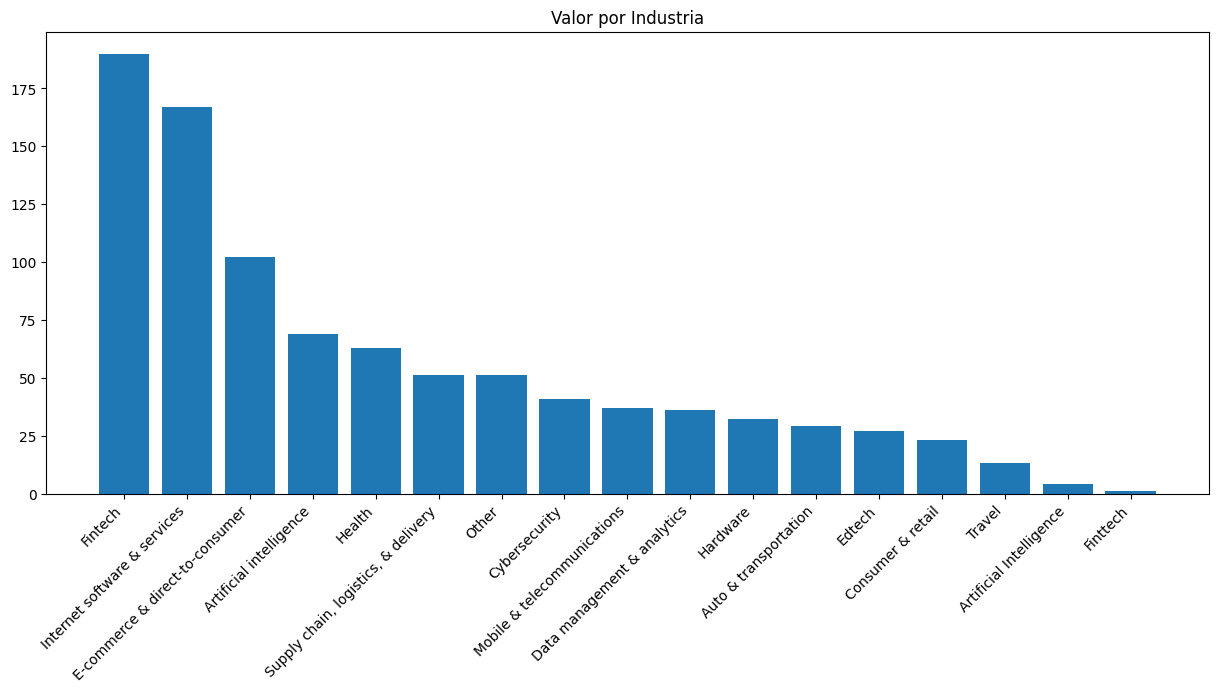

In [ ]:
#criando gráfico de barras com matplot para analisar quais os setores com mais Unicórnios
plt.figure(figsize=(15,6))
plt.bar(Base_Dados['Industria'].value_counts().index, Base_Dados['Industria'].value_counts());
plt.title('Valor por Industria');
plt.xticks(rotation = 45, ha='right');

In [ ]:
#Vendo a participação de cada país no total de unicórnios
Base_Dados['País'].value_counts(normalize = True)

United States           0.509615
China                   0.180556
India                   0.054487
United Kingdom          0.039530
Germany                 0.024573
Israel                  0.022436
France                  0.020299
Canada                  0.016026
Brazil                  0.016026
South Korea             0.011752
Singapore               0.011752
Hong Kong               0.007479
Japan                   0.006410
Australia               0.006410
Mexico                  0.005342
Netherlands             0.005342
Indonesia               0.004274
Spain                   0.004274
Sweden                  0.004274
Switzerland             0.004274
Ireland                 0.003205
United Arab Emirates    0.003205
Norway                  0.003205
Belgium                 0.002137
Thailand                0.002137
Denmark                 0.002137
Philippines             0.002137
Finland                 0.002137
Colombia                0.002137
South Africa            0.002137
Turkey    

In [ ]:
#criando base para servir de análise de pizza
Analise_pizza = round(Base_Dados['País'].value_counts(normalize = True)*100, 1)

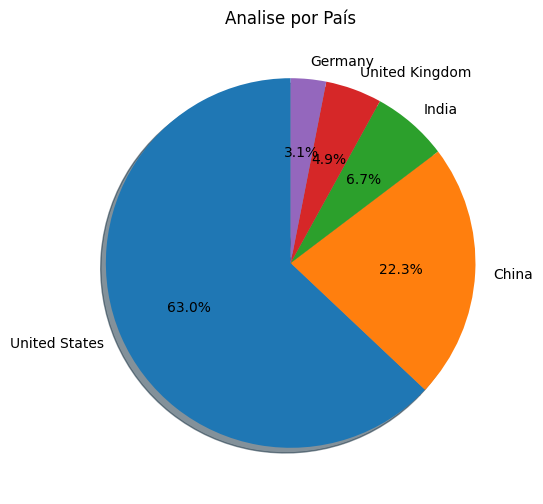

In [ ]:
#Setando e configurando uma análise de pizza dos 5 maiores países em Unicórnios
plt.figure(figsize=(15,6))
plt.title('Analise por País')
plt.pie(Analise_pizza.head(5), labels = Analise_pizza.index[0:5], shadow = True, startangle = 90, autopct='%1.1f%%');


In [ ]:
#Corrigindo erro de formato errado de datas usando pandas
Base_Dados['Data_de_Abertura'] = pd.to_datetime(Base_Dados['Data_de_Abertura'])


In [ ]:
#Criando colunas mës e ano e extraíndo seus valores da coluna Data_de_Abertura
Base_Dados['Mês'] = pd.DatetimeIndex(Base_Dados['Data_de_Abertura']).month
Base_Dados['Mês'] = pd.to_datetime(Base_Dados['Mês'])
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data_de_Abertura']).year

In [ ]:
#Corrigindo a coluna Valor_de_Mercado que trazia valores em objetos e a sigla $
Base_Dados['Valor_de_Mercado'] = pd.to_numeric(Base_Dados['Valor_de_Mercado'].apply(lambda Linha : Linha.replace('$', '')))

In [ ]:
#Veririfando, em lista, em ordem decrescente, os países de maior valor
Analise_Maiores = Base_Dados.groupby(by=['País']).sum('Valor_de_Mercado')



In [ ]:
Analise_Maiores.sort_values(by=['Valor_de_Mercado'], ascending = False)
Analise_Maiores.head()

,País,ID,Valor_de_Mercado,Ano
0,Argentina,298,2.45,2021
1,Australia,2901,50.60,12121
2,Austria,594,5.81,4042
3,Belgium,428,7.55,4040
4,Bermuda,459,1.60,2017


In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                936 non-null    int64         
 1   Empresa           936 non-null    object        
 2   Valor_de_Mercado  936 non-null    float64       
 3   Data_de_Abertura  936 non-null    datetime64[ns]
 4   País              936 non-null    object        
 5   Cidade            921 non-null    object        
 6   Industria         936 non-null    object        
 7   Investidores      935 non-null    object        
 8   Mês               936 non-null    datetime64[ns]
 9   Ano               936 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 73.2+ KB


In [ ]:
#Assimétrica positivo
Base_Dados['Valor_de_Mercado'].skew()

11.746423060026364

In [ ]:
#Base de dados fracamente concentrada no centro
Base_Dados['Valor_de_Mercado'].kurtosis()

176.29228771131034

In [ ]:
#Verificando Normalidade das Variáveis numéricas
from scipy.stats import shapiro
Teste_Shapiro = shapiro(Base_Dados['Valor_de_Mercado'])

ShapiroResult(statistic=0.25216156244277954, pvalue=0.0)

In [ ]:
#Outra forma de avaliar simetria dos dados
Media = Base_Dados['Valor_de_Mercado'].mean()
Mediana = Base_Dados['Valor_de_Mercado'].median()
Moda = Base_Dados['Valor_de_Mercado'].mode()

if Media == Mediana == Moda:
  print('Curva Simétrica')
elif Media <= Mediana <= Moda:
  print('Curva assimétrica Negativa')
else:
  print('Curva assimétrica positiva')

Curva assimétrica positiva


In [ ]:
#Desvio padrão dos dados é de 7.5 bi
Desvio_Padrao = Base_Dados['Valor_de_Mercado'].std()

7.473178790451895

In [ ]:
Base_Dados.describe()

,ID,Valor_de_Mercado,Mês,Ano
count,936.000000,936.000000,936.000000,936.000000
mean,467.500000,3.281154,6.740385,2019.543803
std,270.344225,7.473179,3.248350,2.020273
min,0.000000,1.000000,1.000000,2007.000000
25%,233.750000,1.050000,4.000000,2018.000000
50%,467.500000,1.600000,7.000000,2021.000000
75%,701.250000,3.000000,10.000000,2021.000000
max,935.000000,140.000000,12.000000,2021.000000


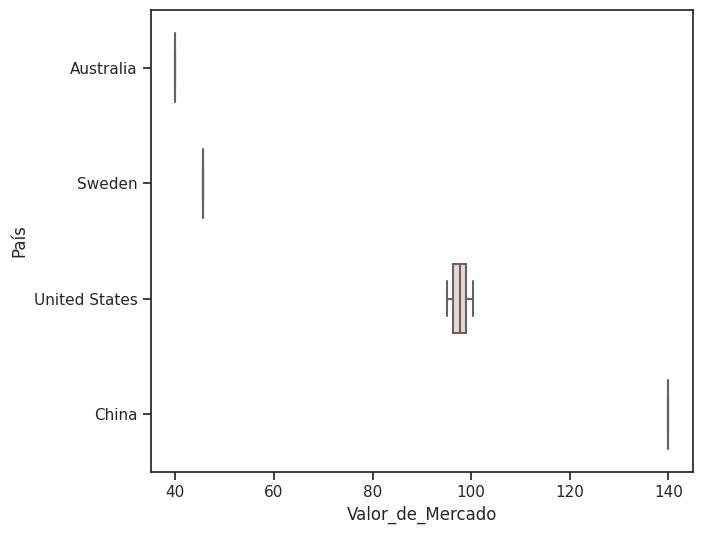

In [ ]:
bd = Base_Dados.head(5)

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(data = bd.sort_values('Valor_de_Mercado'), x='Valor_de_Mercado', y='País', width=.6, palette="vlag");

In [ ]:
bb = Base_Dados.groupby(by = ['Industria']).sum('Valor_de_Mercado').reset_index()
bb.sort_values(by=['Valor_de_Mercado'], ascending = Fals, inplace = True)

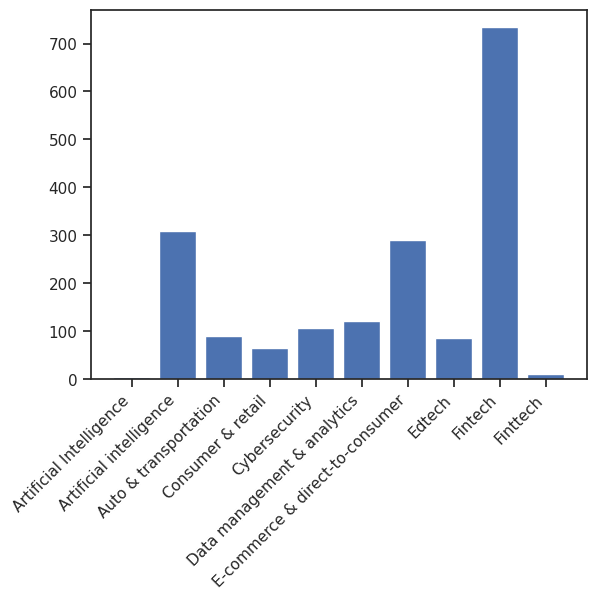

In [ ]:
Base_Nova = bb.head(10)
Base_Nova.sort_values('Valor_de_Mercado', ascending = False)
plt.bar(x = Base_Nova['Industria'].sort_values(), height = Base_Nova['Valor_de_Mercado']);
plt.xticks (rotation = 45, ha ='right');